## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousedata_df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID')

# Display the data table for preview
mousedata_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
len(mousedata_df['Mouse ID'].unique())


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateinfo = mousedata_df[mousedata_df.duplicated(["Mouse ID", "Timepoint"])]
#saves all duplicate mouse information to a list
duplicateID = duplicateinfo.iloc[:,0].tolist()
duplicateID


['g989', 'g989', 'g989', 'g989', 'g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Gets all duplicate mouseID and Data printed here
duplicatemouse = mousedata_df.loc[mousedata_df['Mouse ID'].isin(duplicateID)]
duplicatemouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Code is used to automate, so whateever the found duplicate ID(s), it will drop
mousedata = mousedata_df[~mousedata_df['Mouse ID'].isin(duplicateID)]
mousedata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
# Unique mouse should be one less since the duplicate mouseID was dropped (bad data, no verification on which is the correct one)

len(mousedata['Mouse ID'].unique())


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_means = mousedata[['Drug Regimen','Tumor Volume (mm3)']].rename(columns = 
    {'Tumor Volume (mm3)': 'Mean'}).groupby(['Drug Regimen']).mean()
drug_median = mousedata[['Drug Regimen','Tumor Volume (mm3)']].rename(columns =
    {'Tumor Volume (mm3)': 'Median'}).groupby(['Drug Regimen']).median()
drug_var = mousedata[['Drug Regimen','Tumor Volume (mm3)']].rename(columns =
    {'Tumor Volume (mm3)': 'Variance'}).groupby(['Drug Regimen']).var()
drug_std = mousedata[['Drug Regimen','Tumor Volume (mm3)']].rename(columns =
    {'Tumor Volume (mm3)': 'Standard Deviation'}).groupby(['Drug Regimen']).std()
drug_sem = mousedata[['Drug Regimen','Tumor Volume (mm3)']].rename(columns =
    {'Tumor Volume (mm3)': 'SEM'}).groupby(['Drug Regimen']).sem()

# Assemble the resulting series into a single summary dataframe.
merge1 = pd.merge(drug_means, drug_median, left_index=True, right_index=True)
merge2 = pd.merge(drug_var, drug_std,  left_index=True, right_index=True)
DrugStats = pd.merge(merge1, merge2,  left_index=True, right_index=True)
DrugStats = pd.merge(DrugStats, drug_sem, left_index=True, right_index=True)
DrugStats




,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
DrugStat = mousedata[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
DrugStat

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

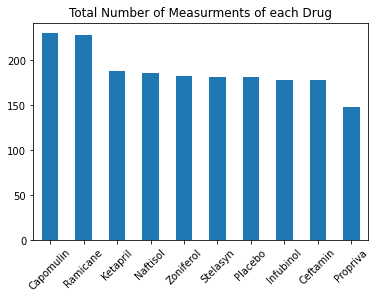

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

#Pandas DataFrame.Plot()
drugcount = mousedata['Drug Regimen'].value_counts().to_frame()
drugbar = drugcount.plot.bar(legend = None)
plt.title('Total Number of Measurments of each Drug')
plt.xticks(rotation = 45)
plt.show()




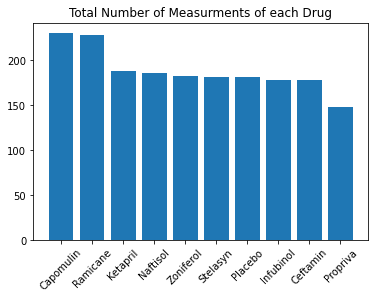

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#matplotlib pyplot
drugnames = list(drugcount.index.values)
drugcounts = drugcount.iloc[:,0]
plt.bar(drugnames, drugcounts)
plt.title('Total Number of Measurments of each Drug')
plt.xticks(rotation = 45)
plt.show()


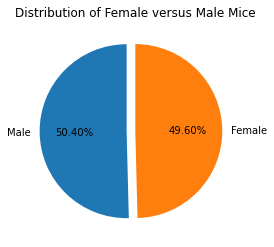

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gendercount = mousedata.drop_duplicates('Mouse ID')['Sex'].value_counts().to_frame()
explode = (0.1,0)
genderpie = gendercount.plot(kind = 'pie', y = 'Sex', explode = explode, autopct = "%1.2f%%", startangle = 90, legend = None)
plt.title('Distribution of Female versus Male Mice')
plt.axis('off')
plt.show()

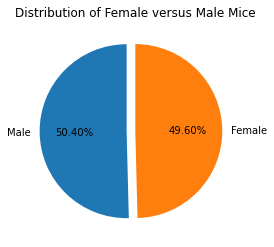

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gendercounts = mousedata.drop_duplicates('Mouse ID')['Sex'].value_counts()
genderpies = plt.pie(gendercounts, explode = explode, labels = gendercounts.index.values,autopct = "%1.2f%%", startangle = 90)
plt.title('Distribution of Female versus Male Mice')
plt.axis('off')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs_4 = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumorVol = mousedata[mousedata['Drug Regimen'].isin(drugs_4)]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
## Easier way of doing this is to sort it descending by , then remove duplicates by MouseID. 
## The highest timepoint of each Mouse ID will be kept
tumorVol = tumorVol.sort_values(by = 'Timepoint', ascending = 0)
tumorVol = tumorVol.drop_duplicates('Mouse ID')
tumorVol






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1872,z581,Infubinol,Female,24,25,45,62.754451,3
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
144,m957,Capomulin,Female,3,19,45,33.329098,1
...,...,...,...,...,...,...,...,...
1205,m756,Infubinol,Male,19,30,5,47.010364,1
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
## Already done using drugs_4

# Create empty list to fill with tumor vol data (for plotting)
tumorDataRows= []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drugs_4:
    # Locate the rows which contain mice on each drug and get the tumor volumes 
    tumorData = tumorVol[tumorVol['Drug Regimen']==drug]
    tumorDataRows.append(tumorData)
    # add subset  
    quartiles = tumorData['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    median = quartiles[0.50]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lowerb = lowerq - (1.5*iqr)
    upperb = upperq + (1.5*iqr)
     # Determine outliers using upper and lower bounds
    outliers_data = tumorData.loc[(tumorData['Tumor Volume (mm3)'] > upperb) | (tumorData['Tumor Volume (mm3)'] < lowerb)].set_index('Mouse ID')
    print(f'\n{drug} Statistics:')
    print(f'The lower and upper quartile of is: {lowerq:.2f} and {upperq:.2f}')
    print(f'The IQR is {iqr:.2f} and median is {median:.2f}' )
    print(f'Any values outside of the range {lowerb:.2f} to {upperb:.2f} are outliers')
    print('Outliers:')
    if outliers_data.empty:
        print('None')
    else:
        print(outliers_data[['Tumor Volume (mm3)']])
    
   

    


Capomulin Statistics:
The lower and upper quartile of is: 32.38 and 40.16
The IQR is 7.78 and median is 38.13
Any values outside of the range 20.70 to 51.83 are outliers
Outliers:
None

Ramicane Statistics:
The lower and upper quartile of is: 31.56 and 40.66
The IQR is 9.10 and median is 36.56
Any values outside of the range 17.91 to 54.31 are outliers
Outliers:
None

Infubinol Statistics:
The lower and upper quartile of is: 54.05 and 65.53
The IQR is 11.48 and median is 60.17
Any values outside of the range 36.83 to 82.74 are outliers
Outliers:
          Tumor Volume (mm3)
Mouse ID                    
c326               36.321346

Ceftamin Statistics:
The lower and upper quartile of is: 48.72 and 64.30
The IQR is 15.58 and median is 59.85
Any values outside of the range 25.36 to 87.67 are outliers
Outliers:
None


Text(0.5, 0, 'Drug Regimen')

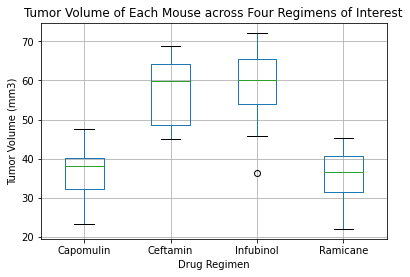

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumorCl = tumorVol[['Drug Regimen','Tumor Volume (mm3)']]
tumorCl.boxplot(by = 'Drug Regimen')
plt.title('Tumor Volume of Each Mouse across Four Regimens of Interest')
plt.suptitle('')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')





## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

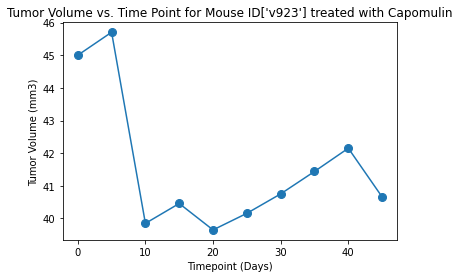

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
IDCapo = mousedata.loc[mousedata['Drug Regimen'] == 'Capomulin']['Mouse ID'].unique()
CID= random.choices(IDCapo)
Capo_df = mousedata.loc[mousedata['Mouse ID'].isin(CID)]
x_axis = Capo_df.loc[:,'Timepoint'].tolist()
y_axis = Capo_df.loc[:,'Tumor Volume (mm3)'].tolist()
plt.plot(x_axis,y_axis, marker = 'o',markersize = 8)
plt.title('Tumor Volume vs. Time Point for Mouse ID' + str(CID) + ' treated with Capomulin')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')



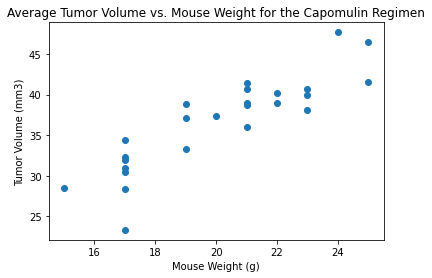

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
MouseCapo = tumorVol.loc[tumorVol['Drug Regimen'] == 'Capomulin']
x_axis2 = MouseCapo['Weight (g)']
y_axis2 = MouseCapo['Tumor Volume (mm3)']
plt.scatter(x_axis2, y_axis2)
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


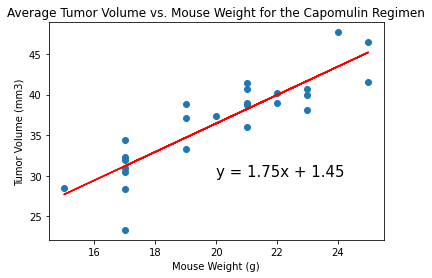

The r-squared is: 0.7686134812139002


In [19]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis2,y_axis2)
regress_values = x_axis2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis2, y_axis2)
plt.title('Average Tumor Volume vs. Mouse Weight for the Capomulin Regimen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.annotate(line_eq,(20,30),fontsize=15,color="black")
plt.plot(x_axis2,regress_values,"r-")
plt.show()
print(f"The r-squared is: {rvalue**2}")